# Pymaceuticals Inc.
---

### Analysis

- After completing the calculations and creating the tables and graphs that were requested, I was able to see and comprehend the data. I can easily see that there is almost an equal distribution between male and female mice. I can also see that there is almost an equal number of timepoints counted for each drug regiment. Capomulin and Ramicane are slightly above the rest, but it is pretty even. I can see that Infubinol has the highest range of final tumor volume and that Capomulin and Ramican have the lowest. Next, I can see that the tumor size for a mouse on using the Capomulin drug regimen decreases substancially over a 30 day window, then starts to grow slightly each day. Lastly, I can see that the heavier the mouse is the heavier the tumor is for the Capomulin drug regimen. There is a positive correlation of .84, which is pretty strong and also makes sense. If the tumor is growing or is bigger then the weight of the mouse should increase. 

- From doing data analysis, I can tell that the strongest perfroming drug against tumors appears to be Capomulin, followed by Ramicane. They had the lowest tumor volume out of the four I tested. We can also come to the conclusion that Capomulin is effective because we can see that the tumor volume decreases over a 30 day span. With this two results I would be pretty confident to say Capomulin should be the perferred drug regimen.   
 

In [196]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
alldata = pd.merge(study_results, mouse_metadata, how='left')

# Display the data table for preview
alldata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [197]:
# Checking the number of mice.
mice = alldata['Mouse ID'].nunique()
mice

249

In [198]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_id = alldata.loc[alldata.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
mice_id

array(['g989'], dtype=object)

In [199]:
# Optional: Get all the data for the duplicate mouse ID. 
findmouse = alldata.loc[alldata['Mouse ID']=="g989", :]
findmouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [200]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
byemouse = alldata[alldata['Mouse ID'].isin(mice_id)==False]
byemouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [201]:
# Checking the number of mice in the clean DataFrame.
newmice = byemouse['Mouse ID'].nunique()
newmice

248

## Summary Statistics

In [202]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = byemouse['Tumor Volume (mm3)'].groupby(byemouse['Drug Regimen']).mean()
median = byemouse['Tumor Volume (mm3)'].groupby(byemouse['Drug Regimen']).median()
variance = byemouse['Tumor Volume (mm3)'].groupby(byemouse['Drug Regimen']).var()
std = byemouse['Tumor Volume (mm3)'].groupby(byemouse['Drug Regimen']).std()
sem = byemouse['Tumor Volume (mm3)'].groupby(byemouse['Drug Regimen']).sem()

summary = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

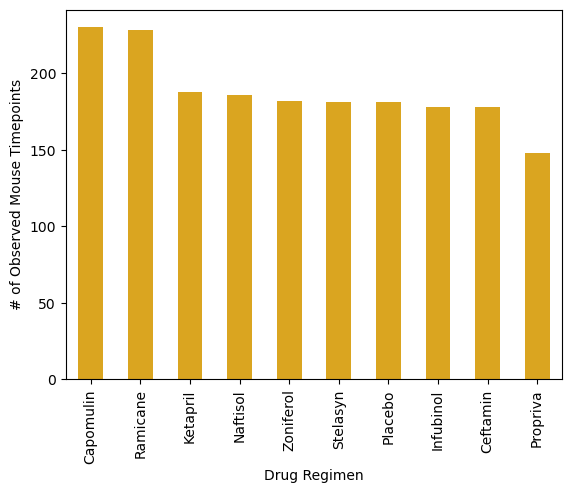

In [203]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar1 = byemouse['Drug Regimen'].value_counts().plot.bar(color='goldenrod')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


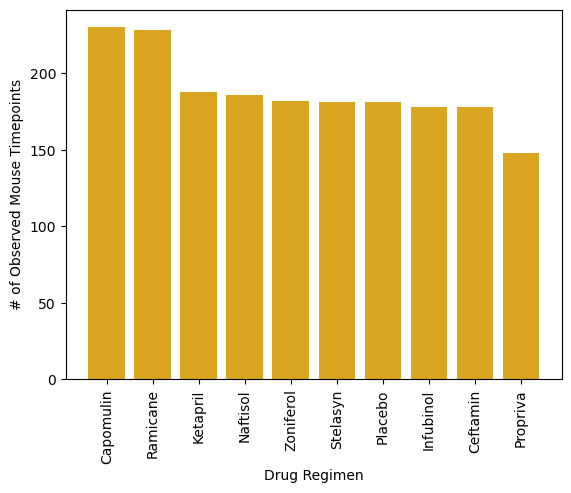

In [204]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar2help = byemouse["Drug Regimen"].value_counts()
bar2 = plt.bar(bar2help.index.values,bar2help.values, color='goldenrod', align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')

plt.show()

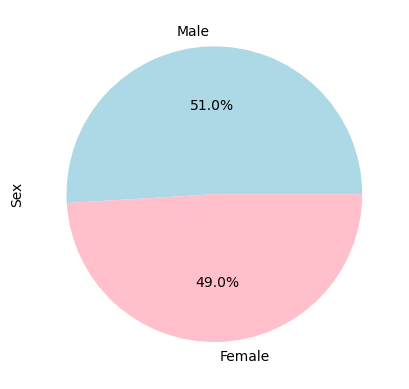

In [205]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
byemouse['Sex'].value_counts().plot.pie(autopct="%1.1f%%", colors = ['lightblue','pink'])
plt.show()

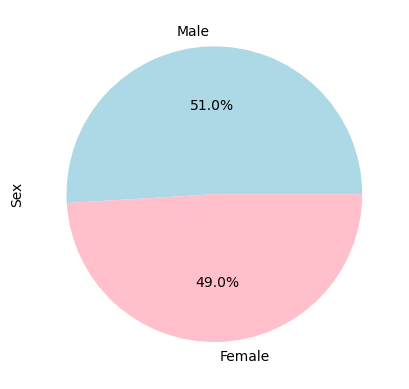

In [206]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(byemouse['Sex'].value_counts(),autopct="%1.1f%%", labels = ['Male','Female'],colors=['lightblue','pink'])

plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [207]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = alldata[alldata["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [208]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)


Capomulin
Ramicane
Infubinol
Ceftamin


In [209]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    upperq = quartiles[0.75].round(2)
    lowerq = quartiles[0.25].round(2)
    iqr = round(upperq-lowerq,2)
    upper_bound = round(upperq + (1.5*iqr),2)
    lower_bound = round(lowerq - (1.5*iqr),2)
 

    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"{drug} has a Upper Quartile of {upperq}.")
    print(f"{drug} has an Lower Quartile of {lowerq}.")
    print(f"{drug} has an IQR of {iqr}.")
    print(f"Any tumor size above {upper_bound} for {drug} would be an outlier.")
    print(f"Any tumor size below {lower_bound} for {drug} would be an outlier.")
    print(f"------------------------------------------------------------")
    treatment+=1   

------------------------------------------------------------
Capomulin has a Upper Quartile of 40.16.
Capomulin has an Lower Quartile of 32.38.
Capomulin has an IQR of 7.78.
Any tumor size above 51.83 for Capomulin would be an outlier.
Any tumor size below 20.71 for Capomulin would be an outlier.
------------------------------------------------------------
Ramicane has a Upper Quartile of 40.66.
Ramicane has an Lower Quartile of 31.56.
Ramicane has an IQR of 9.1.
Any tumor size above 54.31 for Ramicane would be an outlier.
Any tumor size below 17.91 for Ramicane would be an outlier.
------------------------------------------------------------
Infubinol has a Upper Quartile of 65.53.
Infubinol has an Lower Quartile of 54.05.
Infubinol has an IQR of 11.48.
Any tumor size above 82.75 for Infubinol would be an outlier.
Any tumor size below 36.83 for Infubinol would be an outlier.
------------------------------------------------------------
Ceftamin has a Upper Quartile of 64.3.
Ceftamin ha

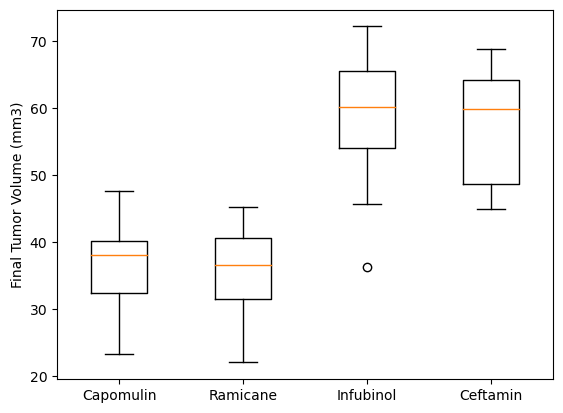

In [210]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
newlabels = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
fig = plt.figure()
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(boxplot_list, labels = newlabels)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

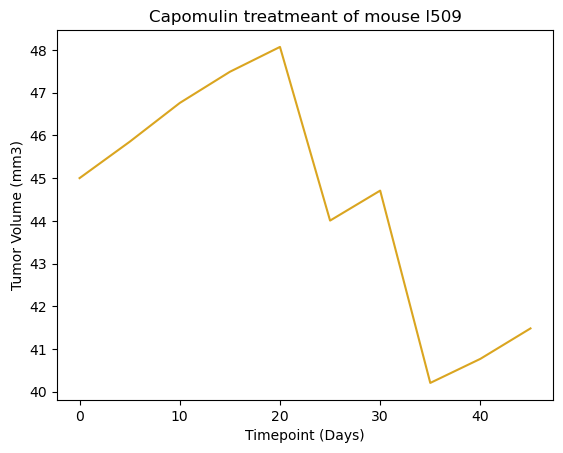

In [211]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = byemouse.loc[byemouse["Drug Regimen"] == "Capomulin",:]

mouse1509 = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
mouse1509.head()
x_axis = mouse1509["Timepoint"]
y_axis = mouse1509["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis,color="goldenrod", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

C:\Users\baseb\AppData\Local\Temp\ipykernel_25044\971011234.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averagecapomulin =Capomulin_df.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

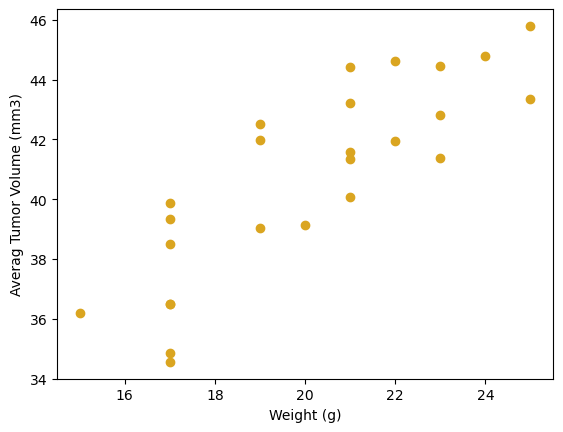

In [212]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
averagecapomulin =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(averagecapomulin['Weight (g)'],averagecapomulin['Tumor Volume (mm3)'], color="goldenrod")
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


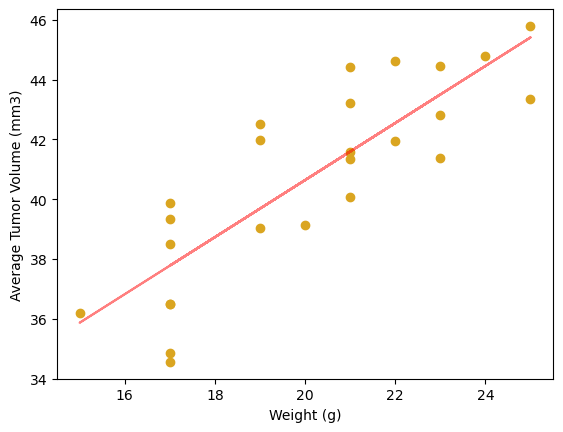

In [213]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(averagecapomulin['Weight (g)'],averagecapomulin['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(averagecapomulin["Weight (g)"],averagecapomulin["Tumor Volume (mm3)"])
regress_values=averagecapomulin["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(averagecapomulin["Weight (g)"],averagecapomulin["Tumor Volume (mm3)"],color='goldenrod')
plt.plot(averagecapomulin["Weight (g)"], regress_values, color='red',alpha=.5)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()